<h1><center><b>NFL Win Probability</b></center></h1>

<h2><center><i>Renan Ferretti</i></center></h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

df = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,...,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,None,0,NaN,NaN,H.Ward,00-0017162,1,NaN,...,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,None,0,NaN,...,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,None,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,None,0,NaN,NaN,NaN,None,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
for col in df.columns:    
  print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

In [ ]:
print('Games: ', len(set(df['GameID'])))
print('Plays: ', len(df['GameID']))

Games:  2048
Plays:  362447


In [ ]:
df['GameID'] = df['GameID'].astype(int)

# Data Cleaning

Removed variables include:

- unique player information

- duplications of other variables

In [ ]:
df_cleaned = df.drop(columns = ['desc','yrdln','PlayTimeDiff','time','Date','SideofField',
                                'PlayAttempted','DefTwoPoint','Passer','Passer_ID','PassLength','PassLocation','Interceptor',
                                'Rusher','Rusher_ID','RunLocation','RunGap','Receiver','Receiver_ID','Returner',
                                'BlockingPlayer','Tackler1','Tackler2','RecFumbTeam','RecFumbPlayer','PenalizedTeam',
                                'PenaltyType','PenalizedPlayer','Timeout_Team','PassAttempt',
                                'PassOutcome','AirYards','YardsAfterCatch','QBHit','RushAttempt','Reception','Fumble','Sack',
                                'Challenge.Replay','ChalReplayResult','Accepted.Penalty','Timeout_Indicator',
                                'posteam_timeouts_pre', 'yacWPA', 'airWPA', 'airEPA', 'yacEPA'])

## Appending game results to each row

Identify the winning team and the losing team at the end of the game

In [ ]:
df_result = df_cleaned.loc[:, ['GameID','posteam','DefensiveTeam','PlayType','PosTeamScore','DefTeamScore',
                           'ScoreDiff','HomeTeam','AwayTeam']]

In [ ]:
df_result.PlayType.value_counts()

Pass                  141866
Run                   107448
Kickoff                20846
Punt                   19557
No Play                18996
Timeout                14393
Sack                    9448
Extra Point             9008
Field Goal              7902
Quarter End             4217
Two Minute Warning      3257
QB Kneel                3133
End of Game             1759
Spike                    584
Half End                  33
Name: PlayType, dtype: int64

In [ ]:
# create lists of tuples for winning teams, losing teams, and ties
winning_teams = []
losing_teams = []
tying_teams = []

for index,row in df_result.iterrows():
    if row['PlayType'] == 'End of Game' and row['ScoreDiff'] > 0:
        winning_teams.append((row['GameID'], row['posteam']))
        losing_teams.append((row['GameID'], row['DefensiveTeam']))
    elif row['PlayType'] == 'End of Game' and row['ScoreDiff'] < 0:
        winning_teams.append((row['GameID'], row['DefensiveTeam']))
        losing_teams.append((row['GameID'], row['posteam']))
    else:
        tying_teams.append((row['GameID'], row['HomeTeam']))

In [ ]:
# should have equal number of winning and losing teams
print(len(set(winning_teams)))
print(len(set(losing_teams)))

1694
1694


In [ ]:
winning_teams = dict(winning_teams)
losing_teams = dict(losing_teams)
tying_teams = dict(tying_teams)

In [ ]:
# create a list of the result of each play by using above dictionaries
result_list = []
for index,row in df_result.iterrows():
    if (row['GameID'] in winning_teams.keys()):
        if (row['posteam'] == winning_teams[row['GameID']]):
            result_list.append('W')
    if (row['GameID'] in losing_teams.keys()):
        if (row['posteam'] == losing_teams[row['GameID']]):
            result_list.append('L')
    elif (row['GameID'] in tying_teams.keys()):
        if pd.notnull(row['posteam']):
            result_list.append('T')

In [ ]:
print(df_result.shape)
print(len(result_list))

(362447, 9)
340468


The length of the list is different than the number of rows in the dataframe

In [ ]:
# check rows where possessing team is not null
df_result.loc[(pd.notnull(df_result['posteam']))].shape

(340468, 9)

The reason was because some columns have null in the possessing team column, this could be plays like the end of the half or of the game

In [ ]:
df_result.loc[(pd.notnull(df_result['posteam'])),'result'] = result_list
df_cleaned['result'] = df_result['result']

# Data Exploration

## Plays per time

Text(0.5, 1.0, 'Histogram of Number of Plays Occuring in Every Minute')

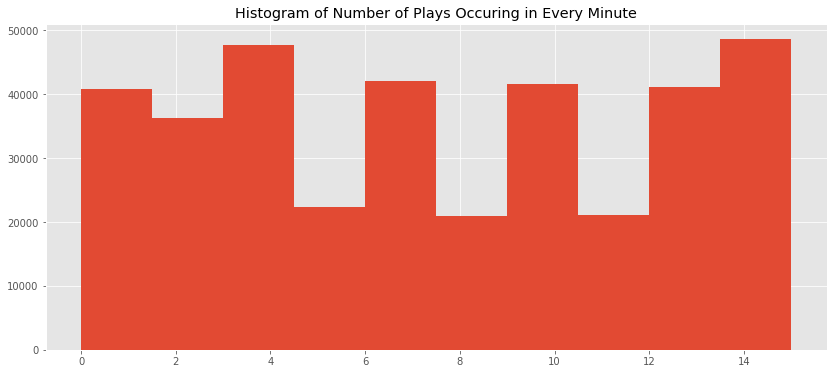

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(df_cleaned['TimeUnder'])
plt.title('Histogram of Number of Plays Occuring in Every Minute')

Text(0, 0.5, 'Plays')

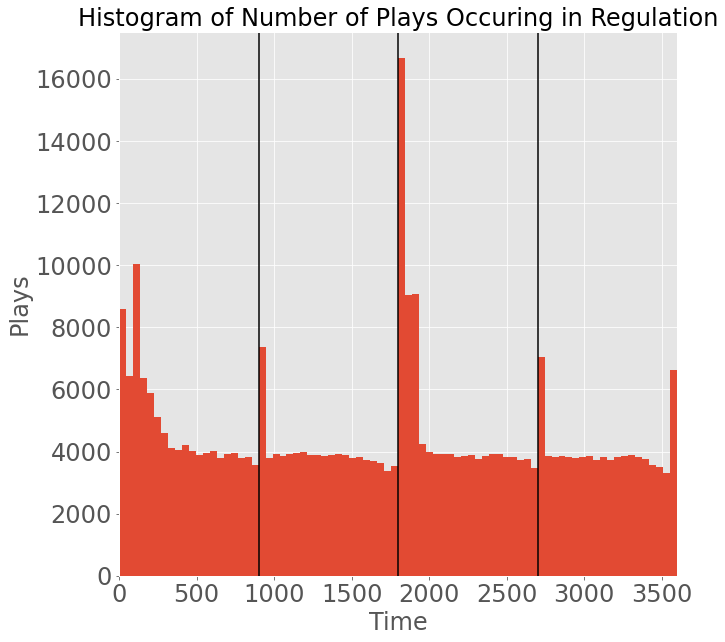

In [ ]:
plt.figure(figsize = (10,10))
plt.hist(df_cleaned['TimeSecs'].dropna(), bins=100)
plt.xlim(0,3600)
plt.axvline(x=900, color='black')
plt.axvline(x=1800, color='black')
plt.axvline(x=2700, color='black')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title('Histogram of Number of Plays Occuring in Regulation', fontsize=24)
plt.xlabel('Time', fontsize=24)
plt.ylabel('Plays', fontsize=24)

## Plays by type

Text(0, 0.5, 'Count of Plays')

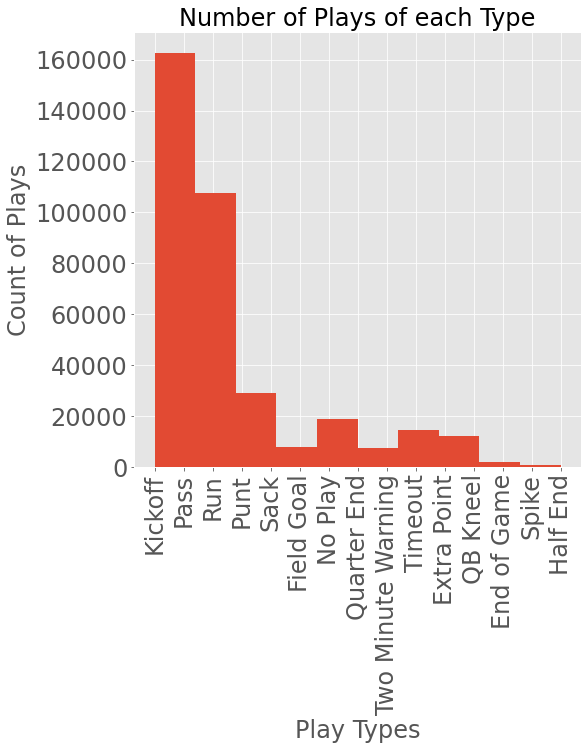

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned['PlayType'])
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.title('Number of Plays of each Type', fontsize=24)
plt.xlabel('Play Types', fontsize=24)
plt.ylabel('Count of Plays', fontsize=24)

## Plays by field position and down

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text major ticklabel objects>)

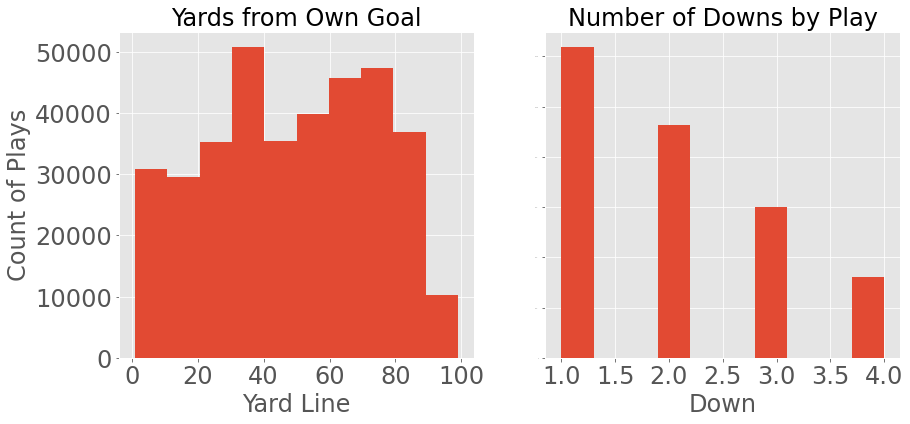

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.hist(df_cleaned['yrdline100'].dropna())
plt.title('Yards from Own Goal', fontsize=24)
plt.xlabel('Yard Line', fontsize=24)
plt.ylabel('Count of Plays', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.subplot(1,2,2)
plt.hist(df_cleaned['down'].dropna())
plt.title('Number of Downs by Play', fontsize=24)
plt.xlabel('Down', fontsize=24)
plt.ylabel('', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=1)

## Score Differential

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

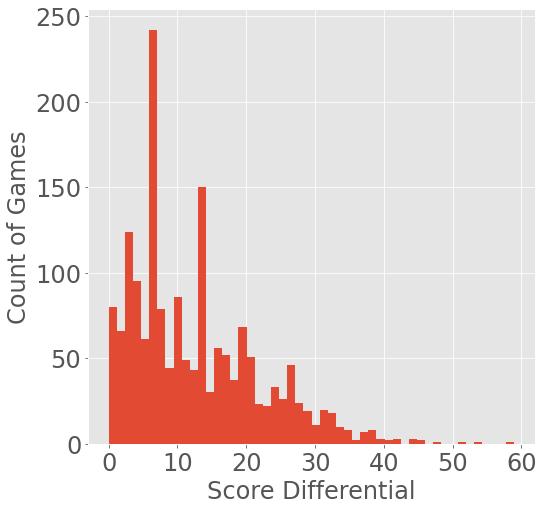

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned.loc[df_cleaned['PlayType'] == 'End of Game', 'ScoreDiff'].apply(abs).dropna(), bins=50)
plt.xlabel('Score Differential',fontsize=24)
plt.ylabel('Count of Games',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

Most of the mass is at 3, 7 and 14

# Feature Engineering

## Removing specific play types

Delete:

- special teams plays

- extra point

- plays without a down

In [ ]:
print('Total Number of plays ran: ',df_cleaned.loc[(pd.notnull(df_cleaned['posteam']))].shape[0])
print('Total Number of downed plays ran: ', df_cleaned.loc[(pd.notnull(df_cleaned['posteam'])) & (pd.notnull(df_cleaned['down']))].shape[0])
print('Number of Touchdowns: ', df_cleaned[df_cleaned['Touchdown']==1].shape[0])
print('Number of Safetys: ', df_cleaned[df_cleaned['Safety']==1].shape[0])
print('Number of onside kicks: ', df_cleaned[df_cleaned['Onsidekick']==1].shape[0])
print('Number of Interceptions: ', df_cleaned[df_cleaned['InterceptionThrown']==1].shape[0])
print('Number of Field Goals: ', df_cleaned[pd.notnull(df_cleaned['FieldGoalResult'])].shape[0])
print('Number of Penalties: ', df_cleaned[df_cleaned['Penalty.Yards'] != 0].shape[0])

Total Number of plays ran:  340468
Total Number of downed plays ran:  308229
Number of Touchdowns:  10571
Number of Safetys:  142
Number of onside kicks:  496
Number of Interceptions:  4065
Number of Field Goals:  8016
Number of Penalties:  25859


In [ ]:
plays = ['Pass','Run','Sack','QB Kneel','Spike','Field Goal']
df_filtered = df_cleaned[(df_cleaned['PlayType'].isin(plays))]
df_filtered = df_filtered[(pd.isna(df_filtered['TwoPointConv'])) & (df_filtered['Onsidekick'] == 0) & ~(pd.isna(df_filtered['down'])) ]
df_filtered = df_filtered[df_filtered['TimeSecs'] > 0]

dropped_cols = ['DefensiveTeam','PuntResult','Onsidekick','ExPointResult','sp',
                'TimeUnder','TwoPointConv','ReturnResult','PosTeamScore',
                'DefTeamScore','AbsScoreDiff','No_Score_Prob','Opp_Field_Goal_Prob',
                'Opp_Safety_Prob','Opp_Field_Goal_Prob','Touchdown_Prob','ExPoint_Prob','TwoPoint_Prob','ExpPts',
                'EPA','WPA','Opp_Safety_Prob','Opp_Touchdown_Prob','Win_Prob','Home_WP_pre',
                'Away_WP_pre', 'Field_Goal_Prob', 'Safety_Prob', 'PlayType', 'Drive', 'Yards.Gained']
df_filtered = df_filtered.drop(columns=dropped_cols)
df_filtered = df_filtered[df_filtered['result'] != 'T']

In [ ]:
df_filtered

,GameID,qtr,down,TimeSecs,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,Touchdown,Safety,InterceptionThrown,FieldGoalResult,FieldGoalDistance,Penalty.Yards,ScoreDiff,HomeTeam,AwayTeam,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,Home_WP_post,Away_WP_post,Season,result
179,2009091304,1,1.0,3599.0,51.0,10,6,0.0,0.0,CLE,0,0,0,NaN,NaN,0,0.0,CLE,MIN,3,3,3,3,0.572188,0.427812,2009,L
180,2009091304,1,2.0,3559.0,45.0,4,6,0.0,0.0,CLE,0,0,0,NaN,NaN,0,0.0,CLE,MIN,3,3,3,3,0.547411,0.452589,2009,L
181,2009091304,1,3.0,3553.0,45.0,4,31,0.0,1.0,CLE,0,0,0,NaN,NaN,0,0.0,CLE,MIN,3,3,3,3,0.590727,0.409273,2009,L
182,2009091304,1,1.0,3515.0,40.0,10,29,0.0,1.0,CLE,0,0,0,NaN,NaN,0,0.0,CLE,MIN,3,3,3,3,0.619625,0.380375,2009,L
183,2009091304,1,1.0,3469.0,22.0,10,31,0.0,0.0,CLE,0,0,0,NaN,NaN,0,0.0,CLE,MIN,3,3,3,3,0.604648,0.395352,2009,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362435,2017010102,4,1.0,90.0,80.0,10,0,0.0,0.0,GB,0,0,0,NaN,NaN,0,14.0,DET,GB,1,2,1,2,0.006036,0.993964,2016,W
362437,2017010102,4,2.0,76.0,80.0,10,-1,0.0,0.0,GB,0,0,0,NaN,NaN,0,14.0,DET,GB,1,1,1,1,0.005274,0.994726,2016,W
362439,2017010102,4,3.0,74.0,81.0,11,-3,0.0,0.0,GB,0,0,0,NaN,NaN,0,14.0,DET,GB,0,1,0,1,0.010174,0.989826,2016,W
362442,2017010102,4,1.0,22.0,35.0,10,35,0.0,0.0,DET,1,0,0,NaN,NaN,0,-14.0,DET,GB,0,0,0,0,0.093435,0.906565,2016,L


Filtered the dataframe in important features

In [ ]:
print('Total Number of plays ran: ',df_filtered.shape[0])
print('Total Number of downed plays ran: ', df_filtered.loc[(pd.notnull(df_filtered['down']))].shape[0])
print('Number of Touchdowns: ', df_filtered[df_filtered['Touchdown'] == 1].shape[0])
print('Number of Safetys: ', df_filtered[df_filtered['Safety'] == 1].shape[0])
print('Number of Interceptions: ', df_filtered[df_filtered['InterceptionThrown'] == 1].shape[0])
print('Number of Penalties: ', df_filtered[df_filtered['Penalty.Yards'] != 0].shape[0])
print('Number of Field Goals: ', df_filtered[pd.notnull(df_filtered['FieldGoalResult'])].shape[0])

Total Number of plays ran:  221124
Total Number of downed plays ran:  221124
Number of Touchdowns:  8519
Number of Safetys:  88
Number of Interceptions:  3240
Number of Penalties:  3277
Number of Field Goals:  6263


## Dummy variables

Convert field goals into a series of dummy variables (good, blocked or no good)

In [ ]:
df_filtered.FieldGoalDistance = df_filtered.FieldGoalDistance.fillna(0)
df_filtered.FieldGoalResult = df_filtered.FieldGoalResult.fillna(0)

print("Checking field goal data: ")
df_filtered.FieldGoalResult.value_counts()

Checking field goal data: 


0          214861
Good         5290
No Good       840
Blocked       133
Name: FieldGoalResult, dtype: int64

In [ ]:
field_goal_df = pd.DataFrame(df_filtered.FieldGoalResult)
field_goal_df = pd.get_dummies(field_goal_df, drop_first=True)
df_filtered = df_filtered.drop(columns=['FieldGoalResult'])
df_filtered = df_filtered.join(field_goal_df)

Add on Score Differential / Time variable

In [ ]:
df_filtered['scorediff_divsecs'] = df_filtered.ScoreDiff/(df_filtered.TimeSecs + 0.01)

# Predictive Modeling

In [ ]:
Train = df_filtered[df_filtered['Season'].isin([2009, 2010, 2011, 2012, 2013, 2014, 2015])]
Test = df_filtered[df_filtered['Season'] == 2016]
print(Train.shape)
print(Test.shape)

(193982, 30)
(27142, 30)


In [ ]:
print('Train Games: ', len(set(Train.GameID)))
print('Test Games: ', len(set(Test.GameID)))

Train Games:  1486
Test Games:  208


Random Forest is useful in this situation because they don't overfit as easily as other methods and allow non-linear interactions between features 

## Model building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#features = df_filtered.drop(columns = ['result', 'Season'])
#outcome = df_filtered.result
#X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.25)
y_train = Train.result
X_train = Train.drop(columns = ['result'])
y_test = Test.result
X_test = Test.drop(columns = ['result'])
 

X_train_identifiers = X_train[['GameID', 'HomeTeam', 'AwayTeam', 'Home_WP_post', 'Away_WP_post', 'posteam', 'Season']].copy()
X_test_identifiers = X_test[['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam', 'Season']].copy()
X_train = X_train.drop(columns=['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam','Season'])
X_test = X_test.drop(columns=['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam','Season'])

random_forest_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', n_jobs=-1, random_state=42, max_depth=10)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

## Model evaluation

In [ ]:
# accuracy scores and feature importance
feature_importances = random_forest_classifier.feature_importances_
feature_df = pd.DataFrame(feature_importances, columns=['Importance'])
feature_df['Cols'] = X_train.columns
prediction = random_forest_classifier.predict(X_test)
print('Test Accuracy Rate: ', round(accuracy_score(y_test, prediction), 3))

Test Accuracy Rate:  0.776


In [ ]:
probabilities = random_forest_classifier.predict_proba(X_test)

Text(0.5, 1.0, 'Variable Importance in Random Forest Model')

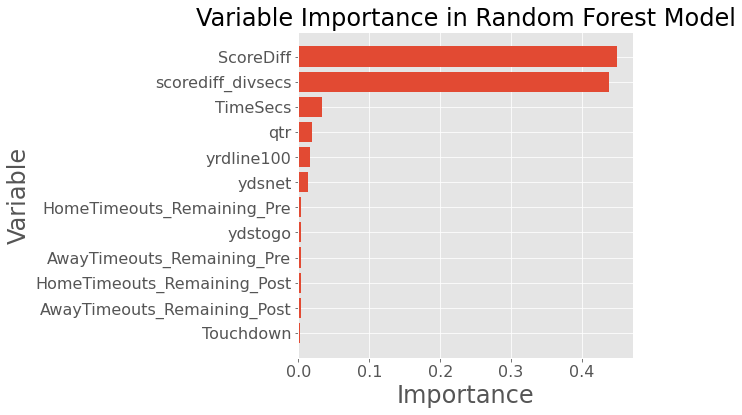

In [ ]:
var_import = dict(zip(feature_df.sort_values(by=['Importance'], ascending=False).Cols, 
                      feature_df.sort_values(by=['Importance'], ascending=False).Importance))
values = list(var_import.values())[0:12]
labels = list(var_import.keys())[0:12]

plt.figure(figsize=(6,6))
plt.barh(range(12), values[::-1])
plt.yticks(range(12), labels[::-1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Variable', fontsize=24)
plt.xlabel('Importance', fontsize=24)
plt.title('Variable Importance in Random Forest Model', fontsize=24)

Most important variables to include in our model:

- Score differential

- Time

- Down and Distance to go

- Field Position

- Result

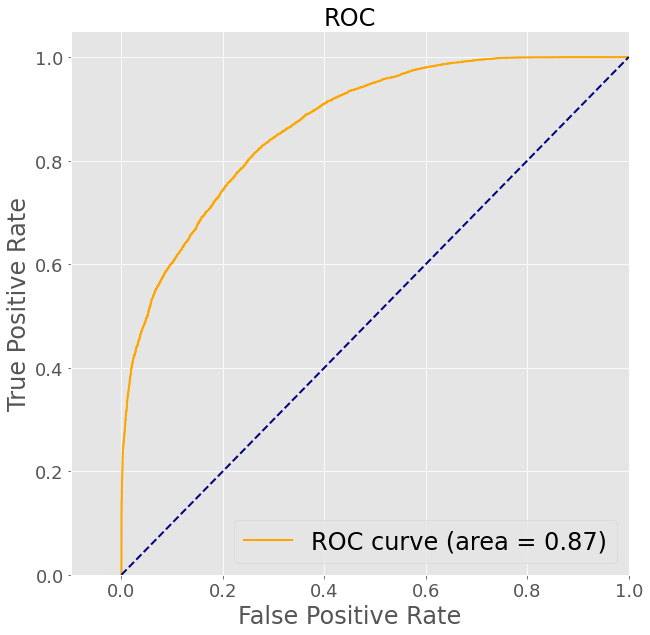

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve([1 if x is 'W' else 0 for x in y_test], probabilities[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('ROC',fontsize=24)
plt.legend(loc="lower right",fontsize=24)
plt.show()

In [ ]:
# check how a game looks
prob_df = pd.DataFrame(probabilities[:,0], columns=['predicted_win_prob'])
game_prob_df = pd.DataFrame(X_test_identifiers)
game_prob_df['predicted_win_prob'] = prob_df.values
game_prob_df['TimeSecs'] = X_test['TimeSecs']

game_prob_df = game_prob_df.sort_values(by=['GameID', 'TimeSecs'], ascending=False)

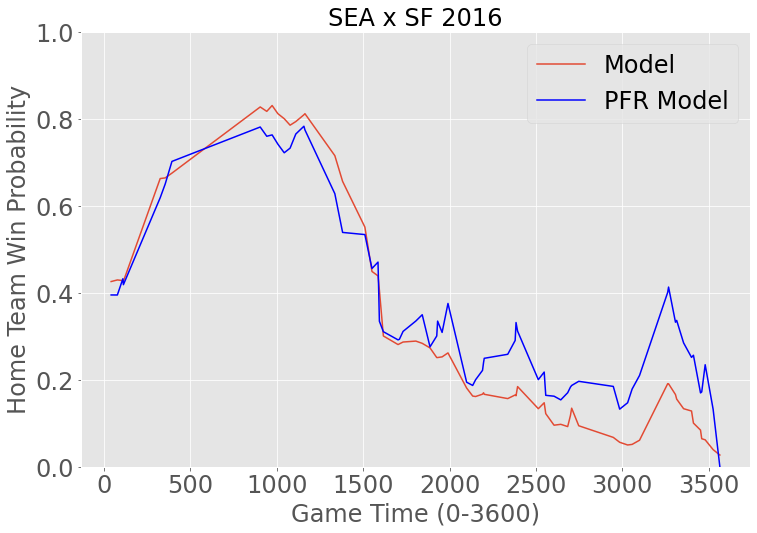

In [ ]:
test_game1 = game_prob_df[(game_prob_df['GameID'] == 2017010115) & (game_prob_df['posteam'] == 'SEA')]

plt.figure(figsize=(12,8))
plt.plot(3600 - test_game1.TimeSecs, test_game1.predicted_win_prob)
plt.plot(3600 - test_game1.TimeSecs, test_game1.Home_WP_post, c='b')
plt.ylim(0,1)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title('SEA x SF 2016', fontsize=24)
plt.xlabel('Game Time (0-3600)', fontsize=24)
plt.ylabel('Home Team Win Probability', fontsize=24)
plt.legend(labels=['Model', 'PFR Model'], fontsize=24)

We compare our model with the Pro Football Reference's win probability algorithm. We keep these values outside the model, but can use them to compare how our results differ from established methods

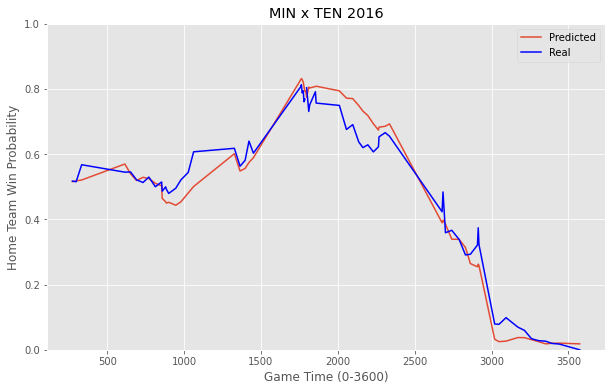

In [ ]:
# another game for quality assurance
test_game2 = game_prob_df[(game_prob_df['GameID'] == 2016091108) & (game_prob_df['posteam'] == 'MIN')]

plt.figure(figsize=(10,6))
plt.plot(3600 - test_game2.TimeSecs, test_game2.predicted_win_prob)
plt.plot(3600 - test_game2.TimeSecs, test_game2.Home_WP_post, c='b')
plt.ylim(0,1)
plt.title('MIN x TEN 2016')
plt.xlabel('Game Time (0-3600)')
plt.ylabel('Home Team Win Probability')
plt.legend(labels=['Predicted', 'Real'])

## Model optimization

### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_parameters = {'criterion':['entropy'], 'max_depth':[x for x in range(10,31,5)], 'n_estimators':[200]}

rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=5, n_jobs=-1)
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'n_estimators': [200]})

In [ ]:
rf_clf.cv_results_

C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklear

{'mean_fit_time': array([  70.97548776,  108.74711514,  137.05230765,  158.58517132,
         167.51430359]),
 'mean_score_time': array([ 2.10265322,  3.0373877 ,  4.09800673,  4.80395265,  5.23615384]),
 'mean_test_score': array([ 0.77904135,  0.77902589,  0.77666485,  0.77186028,  0.76734955]),
 'mean_train_score': array([ 0.78693513,  0.82123986,  0.89002588,  0.95946016,  0.99087029]),
 'param_criterion': masked_array(data = ['entropy' 'entropy' 'entropy' 'entropy' 'entropy'],
              mask = [False False False False False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [10 15 20 25 30],
              mask = [False False False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [200 200 200 200 200],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200},
  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200},
  {'criteri

In [ ]:
rf_clf.score(X_test, y_test)

0.77665610492962933

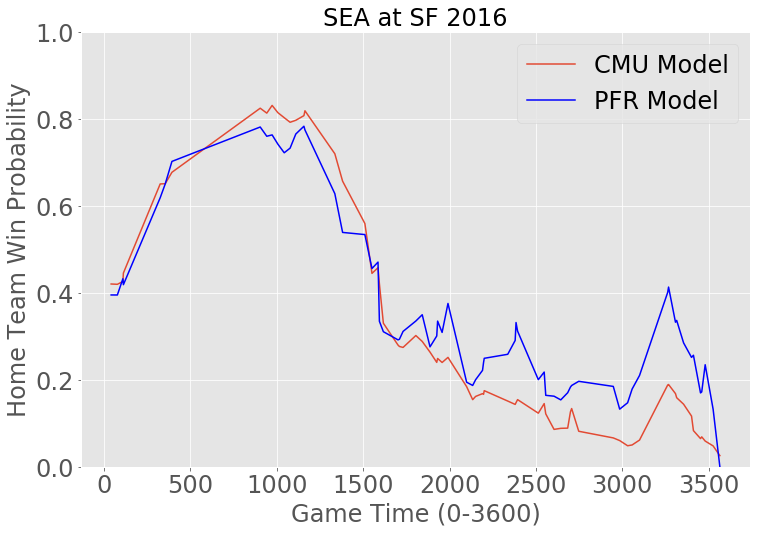

In [ ]:
prob_df = pd.DataFrame(probabilities[:,0], columns=['predicted_win_prob'])
game_prob_df = pd.DataFrame(X_test_identifiers)
game_prob_df['predicted_win_prob'] = prob_df.as_matrix()
game_prob_df['TimeSecs'] = X_test['TimeSecs']

rf_grid_probs = rf_clf.predict_proba(X_test)
game_prob_df['rf_grid_probs'] = rf_grid_probs[:,0]

game_prob_df = game_prob_df.sort_values(by=['GameID', 'TimeSecs'], ascending=False)

test_game1  = game_prob_df[(game_prob_df['GameID'] == 2017010115) & (game_prob_df['posteam'] == 'SEA')]

plt.figure(figsize=(12,8))
plt.plot(3600-test_game1.TimeSecs, test_game1.rf_grid_probs)
plt.plot(3600-test_game1.TimeSecs, test_game1.Home_WP_post, c='b')
plt.ylim(0,1)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.title('SEA x SF 2016', fontsize=24)
plt.xlabel('Game Time (0-3600)', fontsize=24)
plt.ylabel('Home Team Win Probability', fontsize=24)
plt.legend(labels=['Model', 'PFR Model'], fontsize=24)

In [ ]:
fpr, tpr, _ = roc_curve([1 if x is 'W' else 0 for x in y_test], rf_grid_probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate', fontsize=24)
plt.title('ROC', fontsize=24)
plt.legend(loc="lower right",fontsize=24)
plt.show()

### Logistic regression cross-validation

**Finding optimal time to predict outcome**

A team down by 3 points in the first quarter is not the same as being down by 3 points with a minute left in 4th quarter

We need to have a variable that stays relatively constant but starts becoming more and more significant as the seconds increase

In [ ]:
result_3_10 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_10.csv')
result_3_12 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_12.csv')
result_3_4 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_4.csv')
result_3_6 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_6.csv')
result_3_8 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_8.csv')
result_4_10 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_10.csv')
result_4_12 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_12.csv')
result_4_4 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_4.csv')
result_4_6 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_6.csv')
result_4_8 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_8.csv')
result_5_10 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_10.csv')
result_5_12 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_12.csv')
result_5_4 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_4.csv')
result_5_6 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_6.csv')
result_5_8 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_8.csv')
result_6_10 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_10.csv')
result_6_12 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_12.csv')
result_6_4 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_4.csv')
result_6_6 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_6.csv')
result_6_8 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_8.csv')
results_75_4 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_4.csv')
result_75_10 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_10.csv')
result_75_12 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_12.csv')
result_75_8 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_8.csv')
result_75_6 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_4 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_6 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_8 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_10 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_12 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')

In [ ]:
# Cross validated Logistic Regression for one set of hyper-parameter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

results_75_4 = results_75_4[~(pd.isna(results_75_4['probability sample: 1'])) & 
                            ~(pd.isna(results_75_4['probability sample: 2'])) & 
                            ~(pd.isna(results_75_4['probability sample: 3'])) &
                            ~(pd.isna(results_75_4['probability sample: 4']))]

outcome = results_75_4['Home Team Result']
game = results_75_4['GameID']
feats = results_75_4.drop(columns=['GameID','Home Team Result'])
train_feat, test_feat,train_label, test_label = train_test_split(feats, outcome,test_size=.25)
lrcv = LogisticRegressionCV()
lrcv.fit(train_feat, train_label)
print('Test Accuracy Rate: ', round(accuracy_score(test_label, lrcv.predict(test_feat)), 3))

Test Accuracy Rate:  0.872
(1269, 4)
(423, 4)


In [ ]:
# Cross validated Logistic Regression for a set number of hyper-parameters
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

file_list = [result_3_4,result_3_6,result_3_8,result_3_10,result_3_12,
             result_4_4,result_4_6,result_4_8,result_4_10,result_4_12,
             result_5_4,result_5_6,result_5_8,result_5_10,result_5_12,
             result_6_4,result_6_6,result_6_8,result_6_10,result_6_12,
             results_75_4,result_75_6,result_75_8,result_75_10,result_75_12,
             results_75_4,result_75_6,result_75_8,result_75_10,result_75_12,
             result_12_4,result_12_6,result_12_8,result_12_10,result_12_12]

hyper_params = [('Offset time: 3min','weights = 4'),('Offset time: 3min','weights = 6'),('Offset time: 3min','weights = 8'),
                ('Offset time: 3min','weights = 10'),('Offset time: 3min','weights = 12'),
                ('Offset time: 4min','weights = 4'),('Offset time: 4min','weights = 6'),('Offset time: 4min','weights = 8'),
                ('Offset time: 4min','weights = 10'), ('Offset time: 4min','weights = 12'),
                ('Offset time: 5min','weights = 4'),('Offset time: 5min','weights = 6'),('Offset time: 5min','weights = 8'),
                ('Offset time: 5min','weights = 10'),('Offset time: 5min','weights = 12'),
                ('Offset time: 6min','weights = 4'),('Offset time: 6min','weights = 6'),('Offset time: 6min','weights = 8'),
                ('Offset time: 6min','weights = 10'),('Offset time: 6min','weights = 12'),
                ('Offset time: 7.5min','weights = 4'),('Offset time: 7.5min','weights = 6'),('Offset time: 7.5min','weights = 8'),
                ('Offset time: 7.5min','weights = 10'),('Offset time: 7.5min','weights = 12'),
               ('Offset time: 12min','weights = 4'),('Offset time: 12min','weights = 6'),('Offset time: 12min','weights = 8'),
                ('Offset time: 12min','weights = 10'),('Offset time: 12min','weights = 12')]

test_accs = []
test_precision = []
test_F1 = []

for file,params in zip(file_list, hyper_params):
    file = file[~(pd.isna(file['probability sample: 1'])) & 
                ~(pd.isna(file['probability sample: 2'])) & 
                ~(pd.isna(file['probability sample: 3'])) &
                ~(pd.isna(file['probability sample: 4']))]
    
    outcome = file['Home Team Result']
    game = file['GameID']
    feats = file.drop(columns=['GameID','Home Team Result'])

    train_feat, test_feat,train_label, test_label = train_test_split(feats, outcome, test_size=.25)
    lrcv = LogisticRegressionCV()
    lrcv.fit(train_feat, train_label)
    predictions = lrcv.predict(test_feat)
    
    # metrics
    test_accs.append(round(accuracy_score(test_label, predictions), 3))
    binary_preds = [1 if x is 'W' else 0 for x in predictions]
    binary_true = [1 if x is 'W' else 0 for x in test_label]
    test_precision.append(average_precision_score(binary_true, binary_preds))
    test_F1.append(f1_score(binary_true, binary_preds))
    print(params,'\n    Test Accuracy Rate: ', round(accuracy_score(test_label, predictions), 3)) 
    print('    Test Precision Score: ', average_precision_score(binary_true, binary_preds))
    print('    Test F1-Score: ', f1_score(binary_true, binary_preds))
    print('----------------------------')

('Offset time: 3min', 'weights = 4')  Test Accuracy Rate:  0.936
    Test Precision Score:  0.925856366496
    Test F1-Score:  0.946107784431
('Offset time: 3min', 'weights = 6')  Test Accuracy Rate:  0.955
    Test Precision Score:  0.948941866758
    Test F1-Score:  0.961923847695
('Offset time: 3min', 'weights = 8')  Test Accuracy Rate:  0.943
    Test Precision Score:  0.939083414563
    Test F1-Score:  0.947826086957
('Offset time: 3min', 'weights = 10')  Test Accuracy Rate:  0.943
    Test Precision Score:  0.93616153385
    Test F1-Score:  0.951417004049
('Offset time: 3min', 'weights = 12')  Test Accuracy Rate:  0.927
    Test Precision Score:  0.887727591454
    Test F1-Score:  0.931567328918
('Offset time: 4min', 'weights = 4')  Test Accuracy Rate:  0.908
    Test Precision Score:  0.889491104371
    Test F1-Score:  0.92152917505
('Offset time: 4min', 'weights = 6')  Test Accuracy Rate:  0.931
    Test Precision Score:  0.910809682392
    Test F1-Score:  0.936819172113
('Offs

**PS:** 

An attemp to perform the same cross-validation procedure to maximize accuracy would result in the offset time being set almost to (or at) zero and our results would be meaningless

As I'm not looking for the best set of hyper-parameters, rather I'm looking for an interesting set of hyper-parameters, I perform a grid search over a set number of possible variables to illustrate how the methodology performs under a variety of situations

# Data Visualization

I realize and acknowledge that these are merely estimates, the actual WP is close to impossible to ascertain for certain

Heatmaps of metric evaluation for each set of hyper-parameters

In [ ]:
offset_times = [3,4,5,6,7.5, 12]
weight_num = [4,6,8,10,12]

test_accs_array = np.array(test_accs).reshape(6,5)

Text(0.5,1,'Heatmap of Accuracies of Offset Times and Number of Weights')

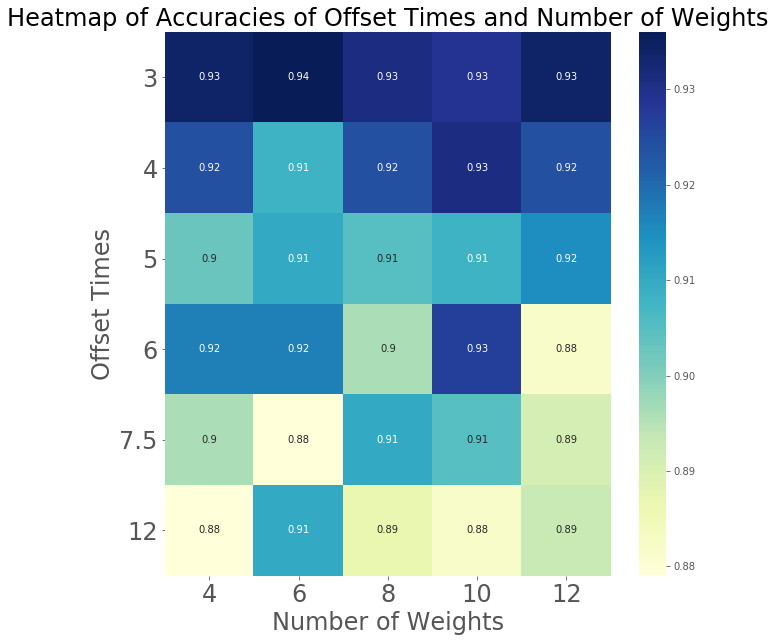

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(test_accs_array, annot=True, cmap="YlGnBu")

plt.yticks([0.5,1.5,2.5,3.5,4.5, 5.5], offset_times,fontsize=24, rotation=0)
plt.xticks([0.5,1.5,2.5,3.5,4.5], weight_num, fontsize=24)
plt.ylabel('Offset Times', fontsize=24)
plt.xlabel('Number of Weights', fontsize=24)
plt.title('Heatmap of Accuracies of Offset Times and Number of Weights', fontsize=24)

Text(0.5,1,'Heatmap of Precision Scores of Offset Times and Number of Weights')

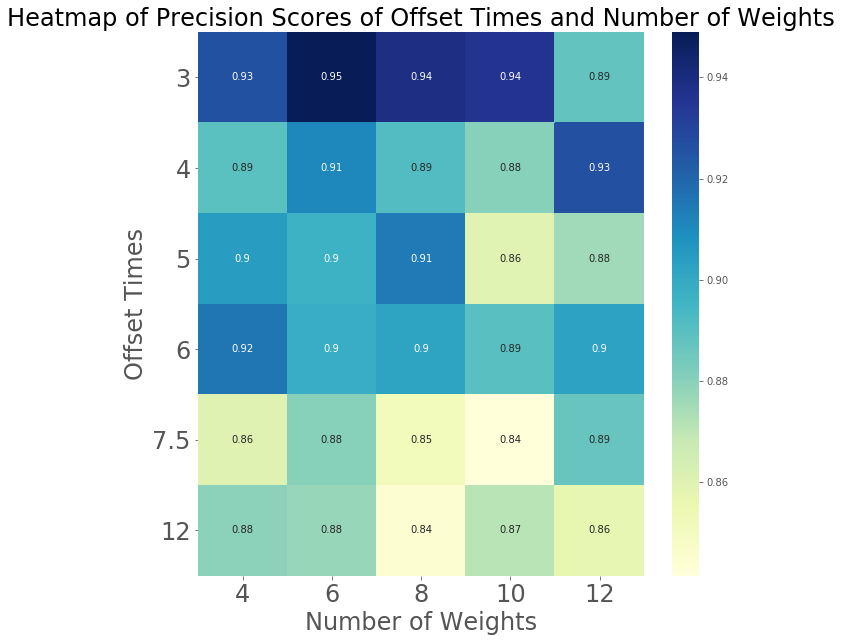

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(np.array(test_precision).reshape(6,5), annot=True, cmap="YlGnBu")

plt.yticks([0.5,1.5,2.5,3.5,4.5, 5.5], offset_times, fontsize=24, rotation=0)
plt.xticks([0.5,1.5,2.5,3.5,4.5], weight_num, fontsize=24)
plt.ylabel('Offset Times', fontsize=24)
plt.xlabel('Number of Weights', fontsize=24)
plt.title('Heatmap of Precision Scores of Offset Times and Number of Weights', fontsize=24)

Text(0.5,1,'Heatmap of F1 Scores of Offset Times and Number of Weights')

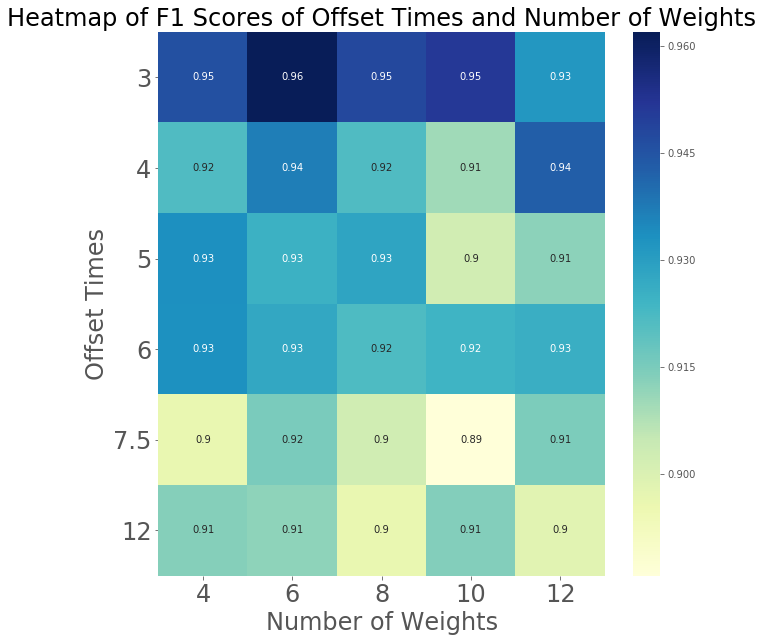

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(np.array(test_F1).reshape(6,5), annot=True, cmap="YlGnBu")

plt.yticks([0.5,1.5,2.5,3.5,4.5, 5.5], offset_times,fontsize=24, rotation=0)
plt.xticks([0.5,1.5,2.5,3.5,4.5], weight_num,fontsize=24)
plt.ylabel('Offset Times', fontsize=24)
plt.xlabel('Number of Weights', fontsize=24)
plt.title('Heatmap of F1 Scores of Offset Times and Number of Weights', fontsize=24)